In [1]:
import pandas as pd
import numpy as np 

# Data

In [664]:
data = pd.read_csv("RAW.csv")
data #only city_development_index and training_hours are numeric 

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,NaN,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,>4,47,0
2,0.624,NaN,No relevent experience,Full time course,Graduate,5,NaN,never,83,0
3,0.789,NaN,No relevent experience,NaN,Graduate,<1,NaN,never,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,4,8,0
...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,14,NaN,1,42,1
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,14,NaN,4,52,1
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,50-99,4,44,0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,<1,500-999,2,97,0


In [650]:
len(data)

19158

In [652]:
test0 = data[data['target']==0]
test1 = data[data['target']==1]
print("0:", len(test0))
print("1:", len(test1))

0: 14381
1: 4777


In [665]:
df = data.dropna() #step 1: drop NAs 
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,>4,47,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,4,8,0
6,0.920,Male,Has relevent experience,no_enrollment,High School,5,50-99,1,24,0
7,0.762,Male,Has relevent experience,no_enrollment,Graduate,13,<10,>4,18,1
8,0.920,Male,Has relevent experience,no_enrollment,Graduate,7,50-99,1,46,1
...,...,...,...,...,...,...,...,...,...,...
19149,0.920,Male,Has relevent experience,no_enrollment,Masters,9,50-99,1,36,1
19150,0.920,Female,Has relevent experience,no_enrollment,Graduate,10,100-500,3,23,0
19152,0.920,Female,Has relevent experience,no_enrollment,Graduate,7,Oct-49,1,25,0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,50-99,4,44,0


In [654]:
len(df)

10129

In [655]:
test0 = df[df['target']==0]
test1 = df[df['target']==1]
print("0:", len(test0))
print("1:", len(test1))

0: 8501
1: 1628


## Encoding

In [490]:
df['target'].value_counts()

0    8501
1    1628
Name: target, dtype: int64

In [492]:
df['relevent_experience'].value_counts()

Has relevent experience    8730
No relevent experience     1399
Name: relevent_experience, dtype: int64

In [493]:
df['enrolled_university'].value_counts()

no_enrollment       8381
Full time course    1099
Part time course     649
Name: enrolled_university, dtype: int64

In [494]:
df['education_level'].value_counts()

Graduate          6584
Masters           2584
High School        658
Phd                257
Primary School      46
Name: education_level, dtype: int64

In [495]:
df['experience'].value_counts()

>20    1998
5       689
6       626
10      620
4       588
9       579
7       550
3       518
8       455
15      442
11      419
2       386
14      367
16      334
12      329
13      258
17      222
19      197
18      183
1       160
<1      119
20       90
Name: experience, dtype: int64

In [496]:
df['company_size'].value_counts()

50-99        2300
100-500      2033
10000+       1564
Oct-49       1109
1000-4999    1035
<10           981
500-999       664
5000-9999     443
Name: company_size, dtype: int64

In [497]:
df['last_new_job'].value_counts()

1        4460
>4       2109
2        1760
3         673
4         655
never     472
Name: last_new_job, dtype: int64

In [666]:
encoder = {"relevent_experience": {"No relevent experience": 0, "Has relevent experience": 1},
           "education_level": {"Primary School":0, "High School":1, "Graduate": 2, "Masters": 3, "Phd": 4},
           "enrolled_university":{"no_enrollment": 0,"Part time course": 1, "Full time course": 2 },
           "experience":{"<1": 0,"1": 1, "2": 2, "3": 3,"4": 4,"5": 5,"6": 6,"7": 7,"8": 8,
                        "9": 9,"10": 10,"11": 11,"12": 12,"13": 13,"14": 14,"15": 15,"16": 16,"17": 17,
                        "18": 18,"19": 19,"20": 20,'>20':21 },
           "last_new_job":{"1": 1,"2": 2,"3": 3,"4": 4,">4": 5, 'never':6 },
           "company_size":{"<10": 0,"Oct-49": 2,"50-99": 3,"100-500": 4,"500-999": 5,"1000-4999": 6,
                          "5000-9999": 7,"10000+": 8}
          }

In [667]:
df = df.replace(encoder)
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
1,0.776,Male,0,0,2,15,3,5,47,0
4,0.767,Male,1,0,3,21,3,4,8,0
6,0.920,Male,1,0,1,5,3,1,24,0
7,0.762,Male,1,0,2,13,0,5,18,1
8,0.920,Male,1,0,2,7,3,1,46,1
...,...,...,...,...,...,...,...,...,...,...
19149,0.920,Male,1,0,3,9,3,1,36,1
19150,0.920,Female,1,0,2,10,4,3,23,0
19152,0.920,Female,1,0,2,7,2,1,25,0
19155,0.920,Male,1,0,2,21,3,4,44,0


In [191]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [668]:
df['gender'] = le.fit_transform(df['gender'])

In [669]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
1,0.776,1,0,0,2,15,3,5,47,0
4,0.767,1,1,0,3,21,3,4,8,0
6,0.920,1,1,0,1,5,3,1,24,0
7,0.762,1,1,0,2,13,0,5,18,1
8,0.920,1,1,0,2,7,3,1,46,1
...,...,...,...,...,...,...,...,...,...,...
19149,0.920,1,1,0,3,9,3,1,36,1
19150,0.920,0,1,0,2,10,4,3,23,0
19152,0.920,0,1,0,2,7,2,1,25,0
19155,0.920,1,1,0,2,21,3,4,44,0


## Sampling 

In [670]:
test0 = df[df['target']==0]
test1 = df[df['target']==1]

0: 8501
1: 1628


In [671]:
test0 = test0.sample(n=1628, random_state=42)

In [672]:
print("0:", len(test0))
print("1:", len(test1))

0: 1628
1: 1628


In [673]:
DF = pd.concat([test0, test1], axis = 0)
DF

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
8635,0.920,1,1,0,2,15,5,5,26,0
15437,0.926,1,0,0,3,21,8,5,308,0
18035,0.762,1,0,0,2,12,8,5,51,0
12476,0.897,1,1,0,3,11,5,1,166,0
12065,0.920,1,1,0,2,12,3,1,30,0
...,...,...,...,...,...,...,...,...,...,...
19086,0.624,1,0,0,2,10,7,1,184,1
19122,0.910,1,1,0,2,8,0,3,78,1
19127,0.847,1,1,0,2,8,8,1,10,1
19147,0.624,1,0,2,2,1,4,1,52,1


## Scaling & Normalization 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [674]:
scaler = StandardScaler()
X = scaler.fit_transform(DF.loc[:, DF.columns != 'target'])

In [765]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [675]:
l1_X = preprocessing.normalize(X, norm='l1') #l1 norm

In [676]:
l2_X = preprocessing.normalize(X, norm='l2') #l2 nornm

In [677]:
y = DF.loc[:, DF.columns == 'target']

In [678]:
X1_train, X1_test, y1_train, y1_test = train_test_split(l1_X,y, 
                                                    test_size=0.2,
                                                    random_state=42) #split with l1 norm

In [679]:
X2_train, X2_test, y2_train, y2_test = train_test_split(l2_X,y, 
                                                    test_size=0.2,
                                                    random_state=42) #split with l2 norm

In [680]:
X1_train

array([[ 0.1324493 ,  0.03489352, -0.3176075 , ..., -0.06840452,
         0.18990734, -0.04396545],
       [ 0.09307976,  0.06345709,  0.1010954 , ..., -0.02122974,
        -0.20885251,  0.02526956],
       [ 0.09606222,  0.03689609,  0.05878027, ..., -0.07233033,
        -0.12143389, -0.12884805],
       ...,
       [ 0.15921531,  0.04870435,  0.07759236, ..., -0.01629417,
        -0.16029769, -0.17940334],
       [ 0.14470566,  0.04426581,  0.07052119, ...,  0.1291278 ,
         0.14426456, -0.11506046],
       [-0.18262066,  0.02270478, -0.20666329, ..., -0.04450998,
        -0.07472688,  0.13357322]])

In [684]:
X1_test

array([[ 0.13330972,  0.04077976,  0.06496747, ..., -0.01364298,
         0.22194315,  0.26071565],
       [ 0.12890743,  0.0547598 ,  0.08723948, ..., -0.10734997,
         0.17846502, -0.15281483],
       [ 0.12131054,  0.04709513,  0.07502866, ..., -0.0157558 ,
        -0.05217242, -0.1614614 ],
       ...,
       [ 0.14698031,  0.04496163,  0.07162972, ...,  0.27735719,
        -0.14797951,  0.08672491],
       [ 0.17688893,  0.05411075,  0.08620546, ..., -0.10607759,
        -0.17809146, -0.0474728 ],
       [ 0.08682286,  0.02655932,  0.04231245, ..., -0.09524718,
        -0.08741309,  0.18673941]])

In [682]:
X2_train

array([[ 0.31072835,  0.08186079, -0.74511268, ..., -0.16047819,
         0.44552591, -0.1031437 ],
       [ 0.22893581,  0.1560769 ,  0.2486508 , ..., -0.05221595,
        -0.51368652,  0.06215216],
       [ 0.25327481,  0.09727914,  0.15497833, ..., -0.19070401,
        -0.320169  , -0.33971694],
       ...,
       [ 0.42066557,  0.12868261,  0.20500813, ..., -0.04305112,
        -0.42352533, -0.4740047 ],
       [ 0.39983477,  0.12231041,  0.1948564 , ...,  0.35679173,
         0.39861597, -0.3179224 ],
       [-0.47260292,  0.05875757, -0.53482271, ..., -0.11518712,
        -0.19338526,  0.34567335]])

In [685]:
X2_test

array([[ 0.3264306 ,  0.0998559 ,  0.15908344, ..., -0.03340707,
         0.54346399,  0.6384048 ],
       [ 0.36854747,  0.15655874,  0.24941844, ..., -0.3069145 ,
         0.51023305, -0.43689893],
       [ 0.25066493,  0.09731304,  0.15503232, ..., -0.03255634,
        -0.10780429, -0.33362896],
       ...,
       [ 0.37701964,  0.11533121,  0.18373762, ...,  0.71144976,
        -0.37958269,  0.22245832],
       [ 0.48662706,  0.14886038,  0.23715395, ..., -0.2918228 ,
        -0.48993524, -0.13059917],
       [ 0.20967695,  0.06414068,  0.10218445, ..., -0.23002167,
        -0.21110237,  0.45097513]])

# Model Training

In [365]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [351]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# SVC

In [235]:
from sklearn.svm import SVC

In [766]:
svc = SVC(kernel = 'linear')

In [874]:
parameters = {'C':[0.1, 1, 10, 100, 1000]}
l1_search = GridSearchCV(svc, parameters, cv=5)

In [875]:
parameters = {'C':[0.1, 1, 10, 100, 1000]}
l2_search = GridSearchCV(svc, parameters, cv=5)

In [883]:
l1_search.fit(X1_train, y1_train)

In [877]:
l1_search.best_params_

{'C': 1}

In [692]:
l1_search.score(X1_test, y1_test) 

0.7254601226993865

In [694]:
precision_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7325231446502866

In [695]:
f1_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7199168081368736

In [696]:
recall_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7254601226993865

In [697]:
fpr, tpr, thresholds = metrics.roc_curve(y1_test,l1_search.predict(X1_test))

In [698]:
fpr

array([0.        , 0.15472779, 1.        ])

In [699]:
tpr

array([0.        , 0.58745875, 1.        ])

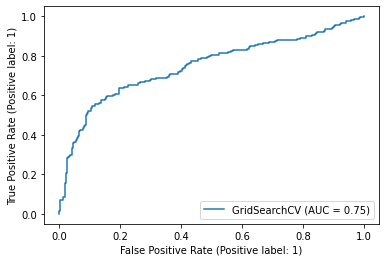

In [700]:
metrics.plot_roc_curve(l1_search, X1_test, y1_test) 
plt.show()

In [882]:
l2_search.fit(X2_train, y2_train)

In [879]:
l2_search.best_params_

{'C': 1}

In [702]:
l2_search.score(X2_test, y2_test) 

0.7269938650306749

In [703]:
precision_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7344450792784442

In [704]:
f1_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7213528802485858

In [705]:
recall_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7269938650306749

In [706]:
fpr, tpr, thresholds = metrics.roc_curve(y2_test,l2_search.predict(X2_test))

In [707]:
fpr

array([0.        , 0.15186246, 1.        ])

In [708]:
tpr

array([0.        , 0.58745875, 1.        ])

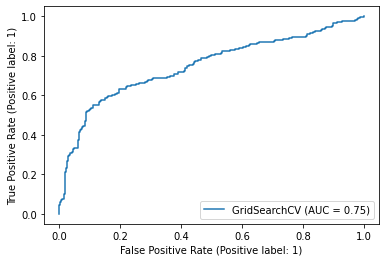

In [709]:
metrics.plot_roc_curve(l2_search, X2_test, y2_test) 
plt.show()

### Feature importance

In [714]:
features = list(DF.loc[:, DF.columns != 'target'].columns)

In [718]:
svc = SVC(kernel = 'linear', C = 1, degree = 2)

In [719]:
result = svc.fit(X2_train, y2_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [721]:
#pd.DataFrame(list(X_train.columns), columns = ['features'])
results = pd.concat([pd.DataFrame(features, columns = ['features']),
                    pd.DataFrame(np.round(result.coef_,3).tolist()[0], columns = ['coef'])],
                    axis = 1)

In [722]:
results.sort_values(by=['coef']) #city_development_index good at predicting 0 class 

,features,coef
0,city_development_index,-2.382
5,experience,-0.406
2,relevent_experience,-0.273
8,training_hours,0.012
4,education_level,0.026
1,gender,0.055
6,company_size,0.058
7,last_new_job,0.136
3,enrolled_university,0.164


In [723]:
confusion_matrix(y2_test, l2_search.predict(X2_test))

array([[296,  53],
       [125, 178]])

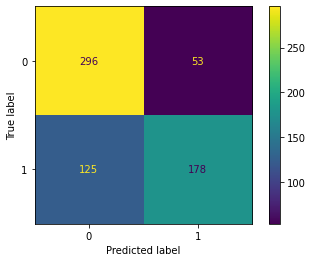

In [724]:
plot_confusion_matrix(l2_search, X2_test, y2_test) 
plt.show()

## Decision Tree

In [371]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [725]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[3,4,5]}

In [726]:
TREE = tree.DecisionTreeClassifier()

In [736]:
l1 = GridSearchCV(TREE, parameters, cv=5)
l2 = GridSearchCV(TREE, parameters, cv=5)

In [738]:
l1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 4, 5]})

In [739]:
l2.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 4, 5]})

In [740]:
l1.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [741]:
l2.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [742]:
l1.score(X1_test, y1_test)

0.7039877300613497

In [743]:
l2.score(X2_test, y2_test)

0.6886503067484663

In [744]:
means = l1.cv_results_["mean_test_score"]
stds = l1.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, l1.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.704 (+/-0.050) for {'criterion': 'gini', 'max_depth': 3}
0.700 (+/-0.040) for {'criterion': 'gini', 'max_depth': 4}
0.700 (+/-0.055) for {'criterion': 'gini', 'max_depth': 5}
0.705 (+/-0.048) for {'criterion': 'entropy', 'max_depth': 3}
0.701 (+/-0.037) for {'criterion': 'entropy', 'max_depth': 4}
0.698 (+/-0.043) for {'criterion': 'entropy', 'max_depth': 5}


In [745]:
precision_score(y1_test, l1.predict(X1_test), average='weighted')

0.7060988004761469

In [746]:
f1_score(y1_test, l1.predict(X1_test), average='weighted')

0.7002478669243917

In [747]:
recall_score(y1_test, l1.predict(X1_test), average='weighted')

0.7039877300613497

In [748]:
fpr, tpr, thresholds = metrics.roc_curve(y1_test,l1.predict(X1_test))

In [749]:
print("fpr:",fpr)
print("tpr:",tpr)

fpr: [0.         0.20057307 1.        ]
tpr: [0.         0.59405941 1.        ]


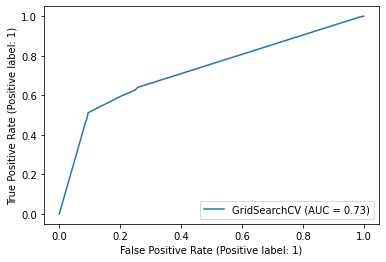

In [750]:
metrics.plot_roc_curve(l1, X1_test, y1_test) 
plt.show()

In [751]:
confusion_matrix(y1_test, l1.predict(X1_test))

array([[279,  70],
       [123, 180]])

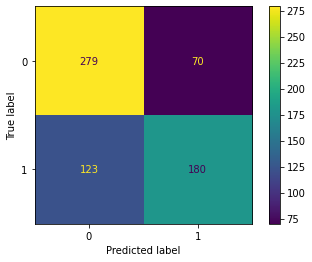

In [752]:
plot_confusion_matrix(l1, X1_test, y1_test) 
plt.show()

In [758]:
TREE = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
TREE.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [754]:
features

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'company_size',
 'last_new_job',
 'training_hours']

In [406]:
import graphviz 

In [761]:
output = tree.export_graphviz(TREE, out_file=None, 
                      feature_names=features,   
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(output)

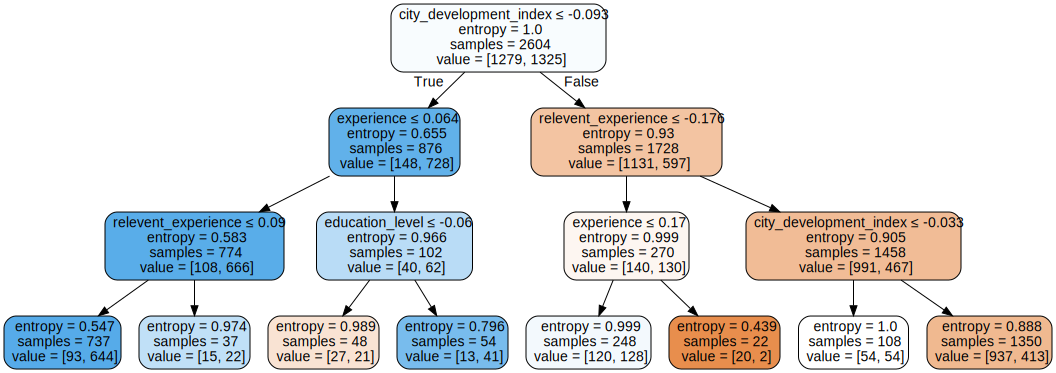

In [762]:
graph

In [763]:
graph.render(filename='tree')

'tree.pdf'

## Logistic Regression

In [778]:
from sklearn.linear_model import LogisticRegression

In [804]:
lrg = LogisticRegression()

In [835]:
parameters = {'C':[0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2','none']}

In [836]:
l1_search = GridSearchCV(lrg, parameters, cv=5)

In [837]:
l2_search = GridSearchCV(lrg, parameters, cv=5)

In [881]:
l1_search.fit(X1_train, y1_train)

In [840]:
l1_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [841]:
l1_search.score(X1_test, y1_test) 

0.7162576687116564

In [842]:
precision_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7161863807614111

In [843]:
f1_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7147864637870901

In [844]:
recall_score(y1_test, l1_search.predict(X1_test), average='weighted')

0.7162576687116564

In [845]:
fpr, tpr, thresholds = metrics.roc_curve(y1_test,l1_search.predict(X1_test))

In [846]:
fpr

array([0.       , 0.2234957, 1.       ])

In [847]:
tpr

array([0.        , 0.64686469, 1.        ])

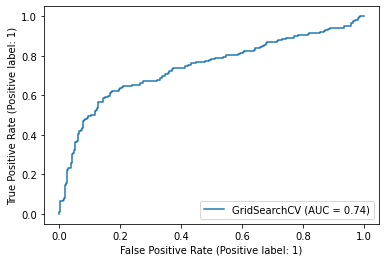

In [848]:
metrics.plot_roc_curve(l1_search, X1_test, y1_test) 
plt.show()

In [880]:
l2_search.fit(X2_train, y2_train)

In [850]:
l2_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [851]:
l2_search.score(X2_test, y2_test) 

0.7162576687116564

In [852]:
precision_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7166123704712632

In [853]:
f1_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7143357407157218

In [854]:
recall_score(y2_test, l2_search.predict(X2_test), average='weighted')

0.7162576687116564

In [855]:
fpr, tpr, thresholds = metrics.roc_curve(y2_test,l2_search.predict(X2_test))

In [856]:
fpr

array([0.        , 0.21489971, 1.        ])

In [857]:
tpr

array([0.       , 0.6369637, 1.       ])

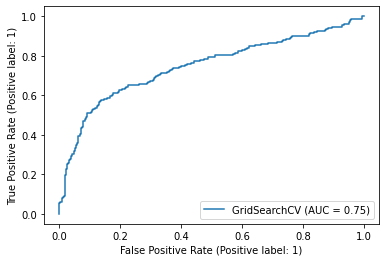

In [858]:
metrics.plot_roc_curve(l2_search, X2_test, y2_test) 
plt.show()

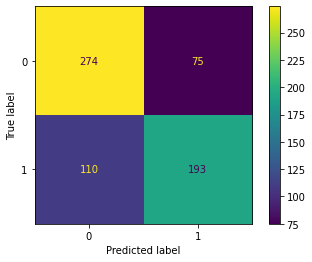

In [859]:
plot_confusion_matrix(l2_search, X2_test, y2_test) 
plt.show()

In [866]:
lrg = LogisticRegression(C= 0.1, penalty= 'l2').fit(X2_train, y2_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [867]:
lrg.coef_

array([[-2.19211397,  0.03096176, -0.28730722,  0.04663928, -0.07407255,
        -0.81661457,  0.17584986,  0.22942271,  0.02747593]])

In [868]:
#pd.DataFrame(list(X_train.columns), columns = ['features'])
results = pd.concat([pd.DataFrame(features, columns = ['features']),
                    pd.DataFrame(np.round(lrg.coef_,3).tolist()[0], columns = ['coef'])],
                    axis = 1)

In [869]:
results.sort_values(by=['coef']) #city_development_index good at predicting 0 class 

,features,coef
0,city_development_index,-2.192
5,experience,-0.817
2,relevent_experience,-0.287
4,education_level,-0.074
8,training_hours,0.027
1,gender,0.031
3,enrolled_university,0.047
6,company_size,0.176
7,last_new_job,0.229
